# Machine Learning Project

# Predicting Residual Strength of FRP Composites Under Fatigue

In [76]:
import pandas as pd
import numpy as np

## Load Data

In [31]:
df = pd.read_csv("Residual_Fatigue.csv")
df

,Material,Nature,Stacking,UTS,Stress_amplitude,Stress_ratio,Frequency,Number_of_plies,Fatigue_cycles,Normalized_fatigue_life,Target
0,1,1,0,330.0,181.5,0.5,3,4,19748,1.00,0.0
1,1,1,0,330.0,214.5,0.5,3,4,8509,1.00,0.0
2,1,1,0,330.0,247.5,0.5,3,4,4252,1.00,0.0
3,0,0,1,560.0,392.0,0.5,10,8,161058,1.00,0.0
4,0,0,1,560.0,448.0,0.5,10,8,94556,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
83,0,0,1,560.0,448.0,0.5,10,8,15000,0.16,528.0
84,0,0,1,560.0,504.0,0.5,10,8,10000,0.29,533.0
85,0,0,1,560.0,504.0,0.5,10,8,5000,0.14,542.0
86,0,2,1,734.0,500.0,0.0,5,8,1000000,1.00,755.0


## Data Preparation

### Data Separation as x and y

In [33]:
y = df["Target"]
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
      ...  
83    528.0
84    533.0
85    542.0
86    755.0
87    769.0
Name: Target, Length: 88, dtype: float64

In [34]:
x = df.drop("Target", axis=1)
x

,Material,Nature,Stacking,UTS,Stress_amplitude,Stress_ratio,Frequency,Number_of_plies,Fatigue_cycles,Normalized_fatigue_life
0,1,1,0,330.0,181.5,0.5,3,4,19748,1.00
1,1,1,0,330.0,214.5,0.5,3,4,8509,1.00
2,1,1,0,330.0,247.5,0.5,3,4,4252,1.00
3,0,0,1,560.0,392.0,0.5,10,8,161058,1.00
4,0,0,1,560.0,448.0,0.5,10,8,94556,1.00
...,...,...,...,...,...,...,...,...,...,...
83,0,0,1,560.0,448.0,0.5,10,8,15000,0.16
84,0,0,1,560.0,504.0,0.5,10,8,10000,0.29
85,0,0,1,560.0,504.0,0.5,10,8,5000,0.14
86,0,2,1,734.0,500.0,0.0,5,8,1000000,1.00


### Data Splitting

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [43]:
X_train

,Material,Nature,Stacking,UTS,Stress_amplitude,Stress_ratio,Frequency,Number_of_plies,Fatigue_cycles,Normalized_fatigue_life
84,0,0,1,560.00,504.00,0.500,10,8,10000,0.29
64,0,0,1,418.00,258.00,0.100,10,8,50000,0.12
33,0,0,3,477.11,344.74,-0.320,10,16,10906,1.00
79,0,0,1,560.00,504.00,0.500,10,8,25000,0.72
55,1,1,0,330.00,181.50,0.500,3,4,2000,0.10
...,...,...,...,...,...,...,...,...,...,...
20,0,0,3,477.11,317.16,-0.217,10,16,78710,1.00
60,0,0,1,418.00,258.00,0.100,10,8,50000,0.12
71,0,0,1,560.00,448.00,0.500,10,8,90000,0.95
14,0,0,3,477.11,372.31,-0.185,10,16,6997,1.00


In [44]:
X_test

,Material,Nature,Stacking,UTS,Stress_amplitude,Stress_ratio,Frequency,Number_of_plies,Fatigue_cycles,Normalized_fatigue_life
76,0,0,1,560.00,448.00,0.500,10,8,45000,0.48
0,1,1,0,330.00,181.50,0.500,3,4,19748,1.00
26,0,0,3,477.11,262.00,-0.263,10,16,485190,1.00
22,0,0,3,477.11,289.58,-0.238,10,16,78290,1.00
12,0,0,3,477.11,372.31,-0.185,10,16,10500,1.00
67,0,0,1,560.00,392.00,0.500,10,8,150000,0.93
10,0,0,3,477.11,400.00,-0.172,10,16,4980,1.00
18,0,0,3,477.11,317.16,-0.217,10,16,25520,1.00
4,0,0,1,560.00,448.00,0.500,10,8,94556,1.00
68,0,0,1,418.00,258.00,0.100,10,8,50000,0.12


## Model Building

### Linear Regression

#### Training the model

In [54]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

#### Applying the model to make a prediction

In [55]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [58]:
y_lr_train_pred

array([ 5.38567536e+02,  3.50222222e+02,  9.30199722e+00,  4.09567195e+02,
        3.39076843e+02,  4.56735197e+02,  5.88525838e+00,  1.78880453e+01,
        2.80883957e+00, -1.48076223e+01,  5.90125203e+00,  3.50222222e+02,
        3.25567133e+02, -3.53364575e-01,  1.78986977e+01,  9.26700322e+00,
        9.89353331e+01,  7.87221938e+01, -4.65754646e+00,  8.88287635e+01,
        9.30472094e+00,  1.13815722e+01,  2.49054041e+02,  3.50222222e+02,
       -9.49958462e+00,  3.71741229e+02, -1.60815539e+01,  1.29023640e+02,
        4.93371446e-01, -1.76124971e+01,  2.98076225e+02, -4.68801777e+00,
        3.40911479e-01,  1.13759277e+01,  3.63932969e+02,  1.13799704e+01,
        3.13622976e+02,  1.20024277e+00,  5.15598824e+02,  7.69000000e+02,
        3.05340041e+02,  9.85837215e+01,  1.03514187e+02,  9.88599878e+01,
        7.55000000e+02, -4.68472808e+00,  4.11834968e+02, -1.61994991e+01,
        2.25012819e+00,  3.50222222e+02,  3.50222222e+02,  9.52464119e+01,
        3.67567672e+02,  

In [59]:
y_lr_test_pred

array([ 4.67646292e+02,  6.90071653e+01, -1.57246404e+01, -1.37677055e+01,
        4.90566873e-01,  3.19032741e+02,  5.90195949e+00, -9.55506969e+00,
        3.11804637e+02,  3.50222222e+02,  5.83568830e+02,  3.50222222e+02,
        2.44587303e+02,  5.52539195e+02])

In [60]:
y_train

84    533.0
64    370.0
33      0.0
79    510.0
55    278.0
      ...  
20      0.0
60    338.0
71    450.0
14      0.0
51    253.0
Name: Target, Length: 74, dtype: float64

In [62]:
y_lr_train_pred

array([ 5.38567536e+02,  3.50222222e+02,  9.30199722e+00,  4.09567195e+02,
        3.39076843e+02,  4.56735197e+02,  5.88525838e+00,  1.78880453e+01,
        2.80883957e+00, -1.48076223e+01,  5.90125203e+00,  3.50222222e+02,
        3.25567133e+02, -3.53364575e-01,  1.78986977e+01,  9.26700322e+00,
        9.89353331e+01,  7.87221938e+01, -4.65754646e+00,  8.88287635e+01,
        9.30472094e+00,  1.13815722e+01,  2.49054041e+02,  3.50222222e+02,
       -9.49958462e+00,  3.71741229e+02, -1.60815539e+01,  1.29023640e+02,
        4.93371446e-01, -1.76124971e+01,  2.98076225e+02, -4.68801777e+00,
        3.40911479e-01,  1.13759277e+01,  3.63932969e+02,  1.13799704e+01,
        3.13622976e+02,  1.20024277e+00,  5.15598824e+02,  7.69000000e+02,
        3.05340041e+02,  9.85837215e+01,  1.03514187e+02,  9.88599878e+01,
        7.55000000e+02, -4.68472808e+00,  4.11834968e+02, -1.61994991e+01,
        2.25012819e+00,  3.50222222e+02,  3.50222222e+02,  9.52464119e+01,
        3.67567672e+02,  

#### Evaluate model performance

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error, mean_squared_error

In [52]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("\n🔹 R2 Score:", r2_score(y_test, y_pred))
    print("🔹 MAE:", mean_absolute_error(y_test, y_pred))
    print("🔹 MedAE:", median_absolute_error(y_test, y_pred))
    print("🔹 RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    return y_pred

In [48]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet()
}
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    evaluate(model, X_test, y_test)


=== Linear Regression ===

🔹 R2 Score: 0.8306059171487077
🔹 MAE: 52.117784822434025
🔹 MedAE: 27.565742645828948
🔹 RMSE: 91.95473317953936

=== Ridge ===

🔹 R2 Score: 0.7969537501866182
🔹 MAE: 51.97889290769416
🔹 MedAE: 19.155441482329763
🔹 RMSE: 100.6751897852344

=== Lasso ===

🔹 R2 Score: 0.8173922742659968
🔹 MAE: 53.47356766921147
🔹 MedAE: 29.714883601770566
🔹 RMSE: 95.47387386422815

=== ElasticNet ===

🔹 R2 Score: 0.5955556813810443
🔹 MAE: 85.72029580640302
🔹 MedAE: 37.572135117617506
🔹 RMSE: 142.0869985175256


### Random Forest

#### Training the model

In [66]:
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor
)
rf = RandomForestRegressor(max_depth = 5, random_state = 200)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=200)

#### Applying the model to make a prediction

In [67]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

#### Evaluate model performance

#### Random Forest Regressor

In [69]:
params_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestRegressor(), params_rf, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)

print("\n🏆 Best RF Params:", grid_rf.best_params_)
print("=== Random Forest Regressor Evaluation ===")
evaluate(grid_rf.best_estimator_, X_test, y_test)


🏆 Best RF Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
=== Random Forest Regressor Evaluation ===

🔹 R2 Score: 0.9690756483625668
🔹 MAE: 21.320700182870343
🔹 MedAE: 9.654374999999987
🔹 RMSE: 39.289388737123346


array([500.15      ,  11.15875   ,   0.        ,   0.        ,
         0.        , 387.87554167,   0.        ,   0.        ,
       124.03      , 349.99646802, 524.15658333, 349.99646802,
       272.95015491, 484.77404131])

#### Gradient Boosting Regressor

In [14]:
params_gbr = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.05],
    'subsample': [0.8, 1.0]
}
grid_gbr = GridSearchCV(GradientBoostingRegressor(), params_gbr, cv=5, scoring='r2')
grid_gbr.fit(X_train, y_train)
print("\n🏆 Best GBR Params:", grid_gbr.best_params_)
print("=== Gradient Boosting Regressor Evaluation ===")
evaluate(grid_gbr.best_estimator_, X_test, y_test)


🏆 Best GBR Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
=== Gradient Boosting Regressor Evaluation ===

🔹 R2 Score: 0.9564778121910864
🔹 MAE: 21.5913823278091
🔹 MedAE: 2.4526663669014366
🔹 RMSE: 46.6101316944378


array([ 4.90368234e+02, -2.68498628e+00,  9.40664812e-05,  1.83549380e-04,
        4.09886469e-04,  3.73779446e+02, -1.31845709e-03,  1.54735559e-03,
        1.57362377e+02,  3.50296373e+02,  5.30581056e+02,  3.50296373e+02,
        2.70220346e+02,  5.03670429e+02])

### MLP Regressor

#### Training the model

In [70]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(30, 20), activation='relu', solver='adam',
                   max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(30, 20), max_iter=1000, random_state=42)

#### Applying the model to make a prediction

In [71]:
y_pred_mlp = mlp.predict(X_test)

#### Evaluate model performance

In [72]:
print("\n=== MLP Regressor (Scikit-Learn) ===")
print("🔹 R2 Score:", r2_score(y_test, y_pred_mlp))
print("🔹 MAE:", mean_absolute_error(y_test, y_pred_mlp))
print("🔹 MedAE:", median_absolute_error(y_test, y_pred_mlp))
print("🔹 RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_mlp)))


=== MLP Regressor (Scikit-Learn) ===
🔹 R2 Score: -328.7611189072317
🔹 MAE: 2030.4769628135534
🔹 MedAE: 761.0860265322297
🔹 RMSE: 4057.1839117172144


## Data Visualization

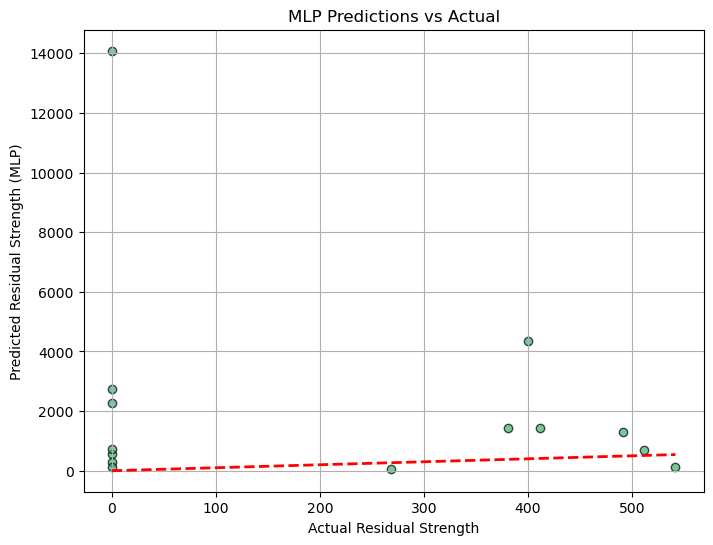

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_mlp, color='mediumseagreen', alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Residual Strength")
plt.ylabel("Predicted Residual Strength (MLP)")
plt.title("MLP Predictions vs Actual")
plt.grid(True)
plt.show()